In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("data/google_places_data.csv")

In [4]:
pd.options.display.max_columns = 50
data.head()

,business_id,phone_number,name,full_address,latitude,longitude,review_count,rating,timezone,website,place_id,place_link,types,Friday,Saturday,Sunday,Monday,Tuesday,Wednesday,Thursday,city,verified,state,Friday_morning,Friday_afternoon,Friday_evening,Saturday_morning,Saturday_afternoon,Saturday_evening,Sunday_morning,Sunday_afternoon,Sunday_evening,Monday_morning,Monday_afternoon,Monday_evening,Tuesday_morning,Tuesday_afternoon,Tuesday_evening,Wednesday_morning,Wednesday_afternoon,Wednesday_evening,Thursday_morning,Thursday_afternoon,Thursday_evening,geo_cluster,country
0,0x3e6751d65629cb05:0x27cbb7ddadc7008c,Unknown,حصن الظفرة Al Dhafra Fort,PXMJ+H7J حصن الظفرة Al Dhafra Fort - Unnamed R...,23.733973,53.980629,58.0,4.7,Asia/Dubai,Unknown,ChIJBcspVtZRZz4RjADHrd23yyc,https://www.google.com/maps/place/data=!3m1!4b...,Museum,2-6 PM,10 AM-6 PM,10 AM-6 PM,10 AM-6 PM,10 AM-6 PM,10 AM-6 PM,10 AM-6 PM,Abu Dhabi,False,Open ⋅ Closes 6 PM,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,United Arab Emirates
1,0x3e675d61493af035:0xa4f20f24f9e8beb7,971569049905,Rafiullah,MP4R+WQJ Rafiullah - Zayed City - Abu Dhabi - ...,23.657332,53.741881,3.0,3.0,Asia/Dubai,Unknown,ChIJNfA6SWFdZz4Rt77o-SQP8qQ,https://www.google.com/maps/place/data=!3m1!4b...,Museum,Open 24 hours,Open 24 hours,Open 24 hours,Open 24 hours,Open 24 hours,Open 24 hours,Open 24 hours,Abu Dhabi,False,Open 24 hours,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.0,United Arab Emirates
2,0x3e91f7041ac64d33:0x6120c5af14b63b93,96822081500,National Museum of Oman,"National Museum of Oman, opposite Al Alam Pala...",23.611601,58.593728,3499.0,4.6,Asia/Muscat,https://www.nm.gov.om/,ChIJM03GGgT3kT4Rkzu2FK_FIGE,https://www.google.com/maps/place/data=!3m1!4b...,"National museum, Museum, Tourist attraction",2-6 PM,10 AM-5 PM,10 AM-5 PM,10 AM-5 PM,10 AM-5 PM,10 AM-5 PM,10 AM-5 PM,Muscat,True,Open ⋅ Closes 5 PM,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,Oman
3,0x487bb1e7815c44db:0x417132a42bd93ef6,443300580058,Science and Industry Museum,"Science and Industry Museum, Liverpool Rd, Man...",53.477136,-2.254582,17398.0,4.4,Europe/London,https://www.scienceandindustrymuseum.org.uk/,ChIJ20Rcgeexe0gR9j7ZK6QycUE,https://www.google.com/maps/place/data=!3m1!4b...,"Science museum, Heritage museum, Museum, Touri...",10 AM-5 PM,10 AM-5 PM,10 AM-5 PM,10 AM-5 PM,10 AM-5 PM,10 AM-5 PM,10 AM-5 PM,Manchester,True,Open ⋅ Closes 5 PM,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,United Kingdom
4,0x487e78e1955eb419:0x4c55c87f0a46d173,441913704000,"Beamish, the Living Museum of the North","Beamish, the Living Museum of the North, Stanl...",54.884752,-1.659321,21957.0,4.8,Europe/London,https://www.beamish.org.uk/,ChIJGbReleF4fkgRc9FGCn_IVUw,https://www.google.com/maps/place/data=!3m1!4b...,"Open air museum, Museum, Tourist attraction",10 AM-5 PM,10 AM-5 PM,10 AM-5 PM,10 AM-5 PM,10 AM-5 PM,10 AM-5 PM,10 AM-5 PM,Stanley,True,Open ⋅ Closes 5 PM,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,United Kingdom


### Basic statistics

In [8]:
data.shape

(15203, 46)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15203 entries, 0 to 15202
Data columns (total 46 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   business_id          15203 non-null  object 
 1   phone_number         15203 non-null  object 
 2   name                 15203 non-null  object 
 3   full_address         15203 non-null  object 
 4   latitude             15198 non-null  float64
 5   longitude            15198 non-null  float64
 6   review_count         15203 non-null  float64
 7   rating               15203 non-null  float64
 8   timezone             15203 non-null  object 
 9   website              15203 non-null  object 
 10  place_id             15203 non-null  object 
 11  place_link           15203 non-null  object 
 12  types                15203 non-null  object 
 13  Friday               15203 non-null  object 
 14  Saturday             15203 non-null  object 
 15  Sunday               15203 non-null 

Data types:
- int (21): columns describing opening hours, which are in fact binary (0/1)
</br>

- float (5): latitude, longitude, review_count, rating and geo_cluster - cluster identifier from already performed clustering
</br>

- bool (1): verified - whether the place is verified
</br>

- object (19): most of the descriptions, adresses, id's

In [50]:
def check_if_string(value):
    """
    Funkcja sprawdzająca, czy wartość może być rzutowana na typ str.
    """
    try:
        str(value)
        return True
    except:
        return False

def check_column_for_strings(column):
    """
    Funkcja sprawdzająca, czy każda wartość w kolumnie może być rzutowana na typ str.
    """
    return all(column.apply(check_if_string))

for column in data.select_dtypes(include=['object']).columns:
    formatted_text = "{:42}".format(f"{column} can be converted to string: ")
    print(f"{formatted_text}{check_column_for_strings(data[column])}")

business_id can be converted to string:   True
phone_number can be converted to string:  True
name can be converted to string:          True
full_address can be converted to string:  True
timezone can be converted to string:      True
website can be converted to string:       True
place_id can be converted to string:      True
place_link can be converted to string:    True
types can be converted to string:         True
Friday can be converted to string:        True
Saturday can be converted to string:      True
Sunday can be converted to string:        True
Monday can be converted to string:        True
Tuesday can be converted to string:       True
Wednesday can be converted to string:     True
Thursday can be converted to string:      True
city can be converted to string:          True
state can be converted to string:         True
country can be converted to string:       True


In [51]:
# Zmień typ danych object na string
for column in data.select_dtypes(include=['object']).columns:
    data[column] = data[column].astype("string")

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15203 entries, 0 to 15202
Data columns (total 46 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   business_id          15203 non-null  string 
 1   phone_number         15203 non-null  string 
 2   name                 15203 non-null  string 
 3   full_address         15203 non-null  string 
 4   latitude             15198 non-null  float64
 5   longitude            15198 non-null  float64
 6   review_count         15203 non-null  float64
 7   rating               15203 non-null  float64
 8   timezone             15203 non-null  string 
 9   website              15203 non-null  string 
 10  place_id             15203 non-null  string 
 11  place_link           15203 non-null  string 
 12  types                15203 non-null  string 
 13  Friday               15203 non-null  string 
 14  Saturday             15203 non-null  string 
 15  Sunday               15203 non-null 

Numeric columns - conclusions:
- a lot of values for latitude oscilate <b>about 25</b>, sd is small
</br>

- longtitude values are more spread out but mostly <b>about 55</b>
</br>

- it seems that most data is only from one region (country)
</br>

- columns for opening hours are in fact <b>binary (0 or 1)</b>
</br>

- the cluster analysis that was pre-done on this dataset resulted in <b>4 clusters</b>


In [15]:
# Statistics for numeric columns:
data.describe()

,latitude,longitude,review_count,rating,Friday_morning,Friday_afternoon,Friday_evening,Saturday_morning,Saturday_afternoon,Saturday_evening,Sunday_morning,Sunday_afternoon,Sunday_evening,Monday_morning,Monday_afternoon,Monday_evening,Tuesday_morning,Tuesday_afternoon,Tuesday_evening,Wednesday_morning,Wednesday_afternoon,Wednesday_evening,Thursday_morning,Thursday_afternoon,Thursday_evening,geo_cluster
count,15198.000000,15198.000000,15203.000000,15203.000000,15203.000000,15203.000000,15203.000000,15203.000000,15203.000000,15203.000000,15203.000000,15203.000000,15203.000000,15203.000000,15203.000000,15203.000000,15203.000000,15203.000000,15203.000000,15203.000000,15203.000000,15203.000000,15203.000000,15203.000000,15203.000000,15198.000000
mean,33.180311,24.517834,709.113136,4.287417,0.106624,0.106624,0.106624,0.108860,0.108860,0.108860,0.106887,0.106887,0.106887,0.108663,0.108663,0.108663,0.108794,0.108794,0.108794,0.108926,0.108926,0.108926,0.108860,0.108860,0.108860,0.698316
std,12.249122,50.581680,5657.130516,0.669842,0.308644,0.308644,0.308644,0.311474,0.311474,0.311474,0.308979,0.308979,0.308979,0.311226,0.311226,0.311226,0.311391,0.311391,0.311391,0.311556,0.311556,0.311556,0.311474,0.311474,0.311474,0.980758
min,-45.577163,-157.870613,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.260005,5.276266,8.000000,4.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.311978,55.284218,32.000000,4.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,45.291451,55.370963,114.000000,4.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,70.032732,176.230310,256877.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


<BarContainer object of 14418 artists>

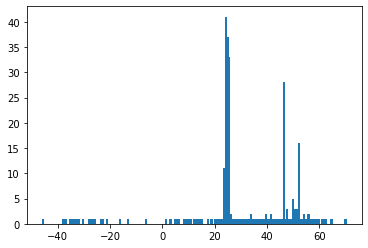

In [76]:
x = np.array(data["latitude"].value_counts().index)
y = np.array(data["latitude"].value_counts())
plt.bar(x,y)

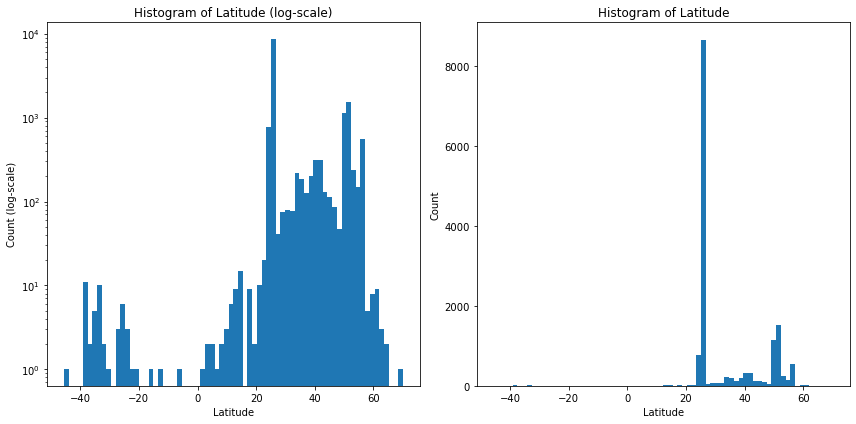

In [92]:
# Utworzenie dwóch subplotów obok siebie
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Wygenerowanie histogramu z osią logarytmiczną
axes[0].hist(x=data["latitude"], bins="fd", log=True)
axes[0].set_xlabel('Latitude')
axes[0].set_ylabel('Count (log-scale)')
axes[0].set_title('Histogram of Latitude (log-scale)')

# Wygenerowanie histogramu z osią liniową
axes[1].hist(x=data["latitude"], bins="fd", log=False)
axes[1].set_xlabel('Latitude')
axes[1].set_ylabel('Count')
axes[1].set_title('Histogram of Latitude')

# Wyświetlenie subplotów
plt.tight_layout()
plt.show()

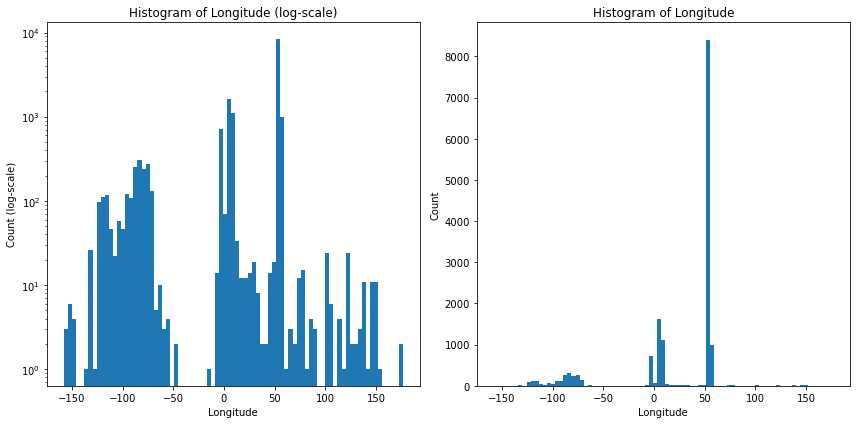

In [93]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].hist(x=data["longitude"], bins="fd", log=True)
axes[0].set_xlabel('Longitude')
axes[0].set_ylabel('Count (log-scale)')
axes[0].set_title('Histogram of Longitude (log-scale)')

axes[1].hist(x=data["longitude"], bins="fd", log=False)
axes[1].set_xlabel('Longitude')
axes[1].set_ylabel('Count')
axes[1].set_title('Histogram of Longitude')

plt.tight_layout()
plt.show()

String columns - conclusions:
- there are some repeated IDs - need to check for duplicate rows
</br>

- there are duplicate names of places (ex. Geldmaat - 116 times, this is a chain of ATMs)
</br>

- there are 112 unique values for timezone, while there should only be 24
</br>

- hotel is the most popular place type
</br>

- United Arab Emirates is the most frequent value for country (9614 out of 15203 places) but there are 194 different coutries in total. This is suspicious and might be the case that the same country has a few different names because of misspelling.
</br>

- the most popular city in the dataset is Dubai

In [74]:
# Description of non-numeric columns
data.describe(include = ['string'])

,business_id,phone_number,name,full_address,timezone,website,place_id,place_link,types,Friday,Saturday,Sunday,Monday,Tuesday,Wednesday,Thursday,city,state,country
count,15203,15203,15203,15203,15203,15203,15203,15203,15203,15203,15203,15203,15203,15203,15203,15203,15203,15203,15203
unique,15108,11282,14192,14737,112,7530,15108,15108,4130,761,634,672,671,675,671,669,1964,311,194
top,0x3e5f432f9552583d:0xc29c1687b02b5c17,Unknown,Geldmaat,Unknown,Asia/Dubai,Unknown,ChIJPVhSlS9DXz4RF1wrsIcWnMI,https://www.google.com/maps/place/data=!3m1!4b...,Hotel,Hours not available,Hours not available,Hours not available,Hours not available,Hours not available,Hours not available,Hours not available,Dubai,State information not provided,United Arab Emirates
freq,2,2610,116,368,9383,6256,2,2,406,4312,4312,4312,4312,4312,4312,4312,6105,4312,9614


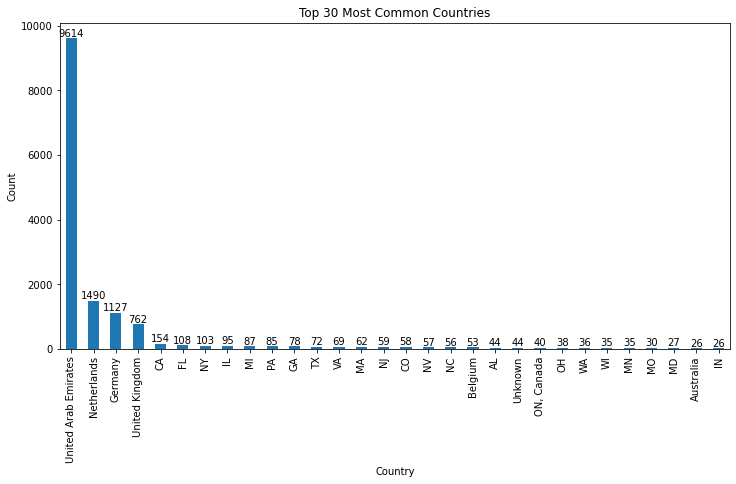

In [129]:
# Zliczanie wystąpień każdej unikalnej wartości w kolumnie "country"
plt.figure(figsize = (12,6))

country_counts = data["country"].value_counts().head(30)

ax = country_counts.plot.bar()

for i, count in enumerate(country_counts):
    ax.annotate(str(count), xy=(i, count), ha='center', va='bottom')

plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Top 30 Most Common Countries')

plt.show()

- It can be observed that for USA, postal abbr. are given instead of country name.
- Some of the country names are badly scraped and need to be corrected in feature engineering processs. For example there are 13 different names for India, 9 different names for Canada etc.
- There is a value 'Unknown' appearing 44 times but we can check that it doesn't correspond to NAs but rather to inability to extract the country from address string correctly. This is to be corrected later in feature engineering process.

In [133]:
a = data[data['country'] == 'WA']["full_address"]
for s in a:
    print(s)

The Museum of Flight, Seattle, WA 98108
Museum of Glass, 1801 Dock St, Tacoma, WA 98402
Famous Footwear, TOWN CENTER, 1604 W Poplar St, Walla Walla, WA 99362
Burien Laundry, 14300 1st Ave S, Burien, WA 98168
Southwest laundry, 11445 Des Moines Memorial Dr S, Seattle, WA 98168
Best Western Plus Ellensburg Hotel, 211 Umptanum Rd, Ellensburg, WA 98926
Hotel Windrow, 502 N Main St, Ellensburg, WA 98926
Seattle City Hall, 600 4th Ave, Seattle, WA 98104
Point Defiance Zoo & Aquarium, 5400 N Pearl St, Tacoma, WA 98407
Kirkland Bakery, 219 Kirkland Ave #102, Kirkland, WA 98033
Le Panier, 1902 Pike Pl, Seattle, WA 98101
The Store, 919 37th St, Anacortes, WA 98221
Baked., 2604 California Ave SW, Seattle, WA 98116
Longview Public Library, 1600 Louisiana St, Longview, WA 98632
Amy Wagner - Prime Listings Group, 1027 State Ave #102, Marysville, WA 98270
Preferred Property Management NW, 1901 Main St Box #835, Lake Stevens, WA 98258
ilani, 1 Cowlitz Wy, Ridgefield, WA 98642
Northern Quest Resort & C

In [132]:
a = data[data['country'] == 'Unknown']["full_address"]
for s in a:
    print(s)

Tower of David, Jerusalem
treat. nails & hair spa, Prince Sultan Road, Qurtoba, Al Khobar 34235, Saudi Arabia
The Hair, Jabir bin Abdullah, Al Mutamarat, Riyadh 12712, Saudi Arabia
Cemetery Malakoff (Old Jewish cemetery), 52 Rue Jules Wilhelm, 2728 Neudorf-Weimershof Luxembourg
Level Shoes, Riyadh Park Mall, Al Aqiq, Riyadh 11413, Saudi Arabia
Wheels Bike Shop (Trek), King Abdulaziz Rd, Madinat Al Umal, Al Khobar 34442, Saudi Arabia
Wheels Bike Shop (Trek), King Abdul Aziz Branch Rd, Alyasmin, Riyadh 13322, Saudi Arabia
هايك اند بايك Hike and Bike, King Saud St, Al Mazruiyah, Dammam 32414, Saudi Arabia
Reinhard's Painting Services, West Virginia 26810
Carowinds, North Carolina
Walt Disney World® Resort, Florida
NOCH, 2777 Bashar Ibn Burd St, Olaya, Al Khobar 34448, Saudi Arabia
Hacked, King Abdullah Rd, Ar Rahmaniyyah, Riyadh 12343, Saudi Arabia
Paul Bakery & Restaurant, طريق الأمير محمد بن سعد بن عبدالعزيز, Al Olaya, Riyadh 12222, Saudi Arabia
Lock, Hittin, Riyadh 13512, Saudi Arabia


In [152]:
india_count = 0
italy_count = 0
canada_count = 0
for s in data["country"].value_counts().index:
    if 'India' in s:
        india_count = india_count + 1
    if 'Italy' in s:
        italy_count = italy_count +1
    if 'Canada' in s:
        canada_count = canada_count + 1
    print(s)
print()
print("Number of different names for country 'India': ", india_count)
print("Number of different names for country 'Italy': ", italy_count)
print("Number of different names for country 'Canada': ", canada_count)

United Arab Emirates
Netherlands
Germany
United Kingdom
CA
FL
NY
IL
MI
PA
GA
TX
VA
MA
NJ
CO
NV
NC
Belgium
AL
Unknown
ON, Canada
OH
WA
WI
MN
MO
MD
Australia
IN
Russia
KY
AZ
OR
TN
BC, Canada
France
LA
OK
CT
AR
KS
UT
Qatar
SC
IA
AK
Metro Manila, Philippines
AB, Canada
Quebec, Canada
South Africa
NM
Irkutsk Oblast, Russia
ID
Egypt
ME
NE
DC
Pakistan
RI
Bahrain
NH
VT
MT
MS
MB, Canada
Sweden
Malta
Bulgaria
NS, Canada
Hungary
Poland
WV
Oman
Switzerland
Maharashtra, India
HI
Isle of Man
Romania
Ireland
Delhi, India
Greece
Denmark
Telangana, India
ND
Karnataka, India
Japan
Spain
Portugal
New Zealand
Ukraine
Israel
Belarus
County Dublin, Ireland
Kuwait
Gujarat, India
Cavite, Philippines
Luxembourg
DE
West Bengal, India
Kaliningrad Oblast, Russia
Saitama, Japan
Tokyo, Japan
Curaçao
Slovakia
Norway
Grenada
Province of Treviso, Italy
Hong Kong
Brazil
Aruba
Kaohsiung City, Taiwan
Serbia
Hualien County, Taiwan
Estonia
Latvia
Federal Territory of Kuala Lumpur, Malaysia
Metropolitan City of Rome Capital